# Assessing the dataset

In [569]:
import pandas as pd

In [571]:
df = pd.read_csv('student_performance_dataset.csv')
df

,What is your age?,What is your gender?,What is your level of education?,What year of study are you in?,What is your socioeconomic status?,What is your current marital status?,What is your primary field of study?,What is your cumulative GPA?,What is your current mode of learning?,What is your primary reason for choosing this learning mode?,...,How frequently do you review your notes or course materials?,How would you rate your academic performance in your current learning mode?,How do you assess your understanding of course materials?,How satisfied are you with the feedback you receive on your assignments?,Do you feel that your current learning mode effectively supports your academic goals?,How do you usually prepare for exams? Select the option that applies the most:,What major challenge do you face in your current mode of learning?,Do you feel you have adequate support from instructors in your current learning mode?,How often do you collaborate with classmates on projects or assignments?,"On a scale of 1 to 10, how would you rate your learning environment"
0,27,Male,Undergraduate,First Year,High Income,Widowed,Engineering,3.50-4.49,In-person,Institutional requirement,...,Rarely,Poor,Somewhat confident,Very dissatisfied,Yes,Online resources,Inaccessibility of resources,No,Often,9
1,20,Male,Postgraduate,First Year,High Income,Widowed,Sciences,3.50-4.49,In-person,Personal Preference,...,Weekly,Very Poor,Very unconfident,Neutral,Yes,Self-study,Lack of engagement,Yes,Sometimes,7
2,38,Female,Postgraduate,Fourth year and above,Low Income,Widowed,Other,4.50-5.00,In-person,Other,...,Weekly,Good,Somewhat confident,Dissatisfied,No,Online resources,Others,No,Often,5
3,38,Male,Undergraduate,Third year,Middle Income,Single,Sciences,2.40-3.49,Online,Flexibility,...,Rarely,Very Poor,Very unconfident,Very dissatisfied,No,Online resources,Others,No,Never,10
4,37,Male,Undergraduate,Fourth year and above,High Income,Divorced,Other,1.00-1.49,Online,Institutional requirement,...,Daily,Good,Somewhat unconfident,Very dissatisfied,No,Online resources,Lack of support from instructors,No,Rarely,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878,24,Female,Other,Second year,Middle Income,Single,Other,1.00-1.49,Online,Personal Preference,...,Weekly,Good,Very Confident,Very dissatisfied,Yes,Study groups,"Technical issues (e.g., internet connectivity,...",No,Always,2
1879,22,Male,Undergraduate,Third year,Middle Income,Single,Sciences,2.40-3.49,In-person,Personal Preference,...,Weekly,Good,Somewhat confident,Satisfied,No,Online resources,"Technical issues (e.g., internet connectivity,...",Yes,Sometimes,9
1880,34,Male,Undergraduate,Third year,Middle Income,Married,Social Science,2.40-3.49,Online,Institutional requirement,...,Rarely,Good,Somewhat confident,Satisfied,Yes,Self-study,Lack of support from instructors,No,Rarely,10
1881,23,Female,Undergraduate,Second year,Low Income,Single,Social Science,1.50-2.39,Online,Other,...,Daily,Fair,Neutral,Dissatisfied,Yes,Self-study,Others,No,Often,5


In [572]:
df.shape

(1883, 32)

In [575]:
df.isna().sum()

What is your age?                                                                                                     0
What is your gender?                                                                                                  0
What is your level of education?                                                                                      0
What year of study are you in?                                                                                        0
What is your socioeconomic status?                                                                                    0
What is your current marital status?                                                                                  0
What is your primary field of study?                                                                                  0
What is your cumulative GPA?                                                                                          0
What is your current mode of learning?  

# Checking for numerical columns

In [577]:
# Iterate over each column in the DataFrame 'df' using the items() method.
for label, content in df.items():  
    # Check if the column data type is numeric (e.g., integers or floats).
    if pd.api.types.is_numeric_dtype(content):  
        # Print the column name if it contains numeric data.
        print(label)  

What is your age?
On a scale of 1 to 10, how engaged are you during classes?
What is your average score in assessments? (Please enter a score out of 100)
On a scale of 1 to 10, how much do you use technology for your studies? (1 being not at all, 10 being extensively)
On a scale of 1 to 10, how would you rate your learning environment


In [578]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

# Exploratory Data Analysis

In [583]:
# importing dependencies
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px


In [585]:
df.describe()

,What is your age?,"On a scale of 1 to 10, how engaged are you during classes?",What is your average score in assessments? (Please enter a score out of 100),"On a scale of 1 to 10, how much do you use technology for your studies? (1 being not at all, 10 being extensively)","On a scale of 1 to 10, how would you rate your learning environment"
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,30.048858,5.581519,67.220393,6.034519,5.740839
std,7.656046,2.712415,14.168478,2.893684,2.714304
min,16.000000,1.000000,6.000000,1.000000,1.000000
25%,24.000000,3.000000,58.000000,4.000000,4.000000
50%,29.000000,6.000000,68.000000,6.000000,6.000000
75%,36.000000,8.000000,79.000000,9.000000,8.000000
max,54.000000,10.000000,98.000000,10.000000,10.000000


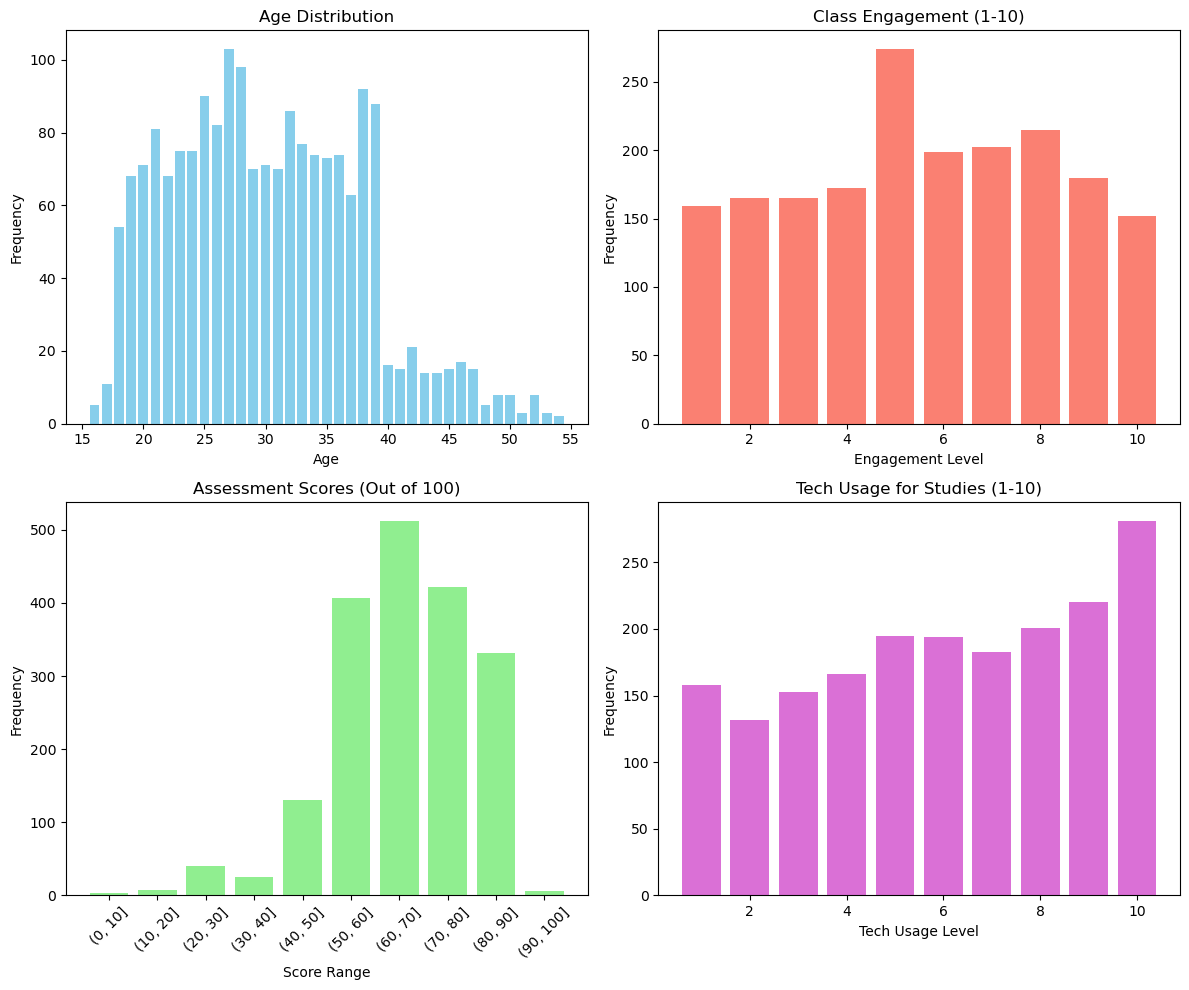

In [586]:
# Visualize distributions and relationships using bar charts
# Create subplots with adjusted spacing
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10), tight_layout=True)

# Age Distribution (binned into groups for better visualization)
age_bins = df["What is your age?"].value_counts().sort_index()
axes[0, 0].bar(age_bins.index, age_bins.values, color='skyblue')
axes[0, 0].set_title("Age Distribution")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Frequency")

# Engagement during classes
engagement_counts = df["On a scale of 1 to 10, how engaged are you during classes?"].value_counts().sort_index()
axes[0, 1].bar(engagement_counts.index, engagement_counts.values, color='salmon')
axes[0, 1].set_title("Class Engagement (1-10)")
axes[0, 1].set_xlabel("Engagement Level")
axes[0, 1].set_ylabel("Frequency")

# Assessment scores (binned into groups of 10 for better visualization)
score_bins = pd.cut(df["What is your average score in assessments? (Please enter a score out of 100)"], bins=range(0, 101, 10))
score_counts = score_bins.value_counts().sort_index()
axes[1, 0].bar(score_counts.index.astype(str), score_counts.values, color='lightgreen')
axes[1, 0].set_title("Assessment Scores (Out of 100)")
axes[1, 0].set_xlabel("Score Range")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for clarity

# Technology usage for studies
tech_usage_counts = df["On a scale of 1 to 10, how much do you use technology for your studies? (1 being not at all, 10 being extensively)"].value_counts().sort_index()
axes[1, 1].bar(tech_usage_counts.index, tech_usage_counts.values, color='orchid')
axes[1, 1].set_title("Tech Usage for Studies (1-10)")
axes[1, 1].set_xlabel("Tech Usage Level")
axes[1, 1].set_ylabel("Frequency")

# Display the plots
plt.show()


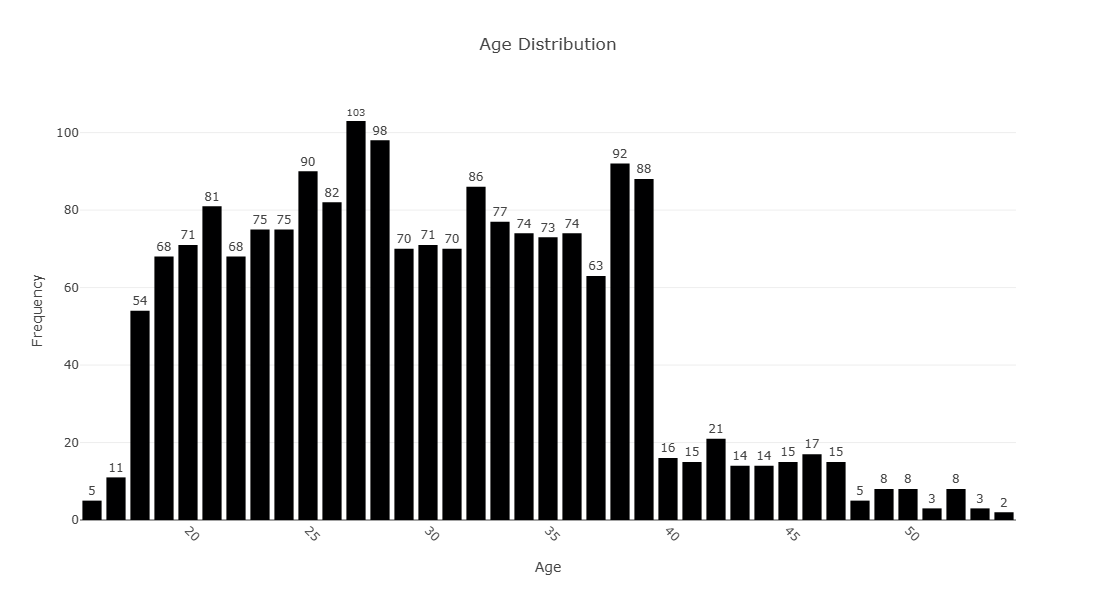

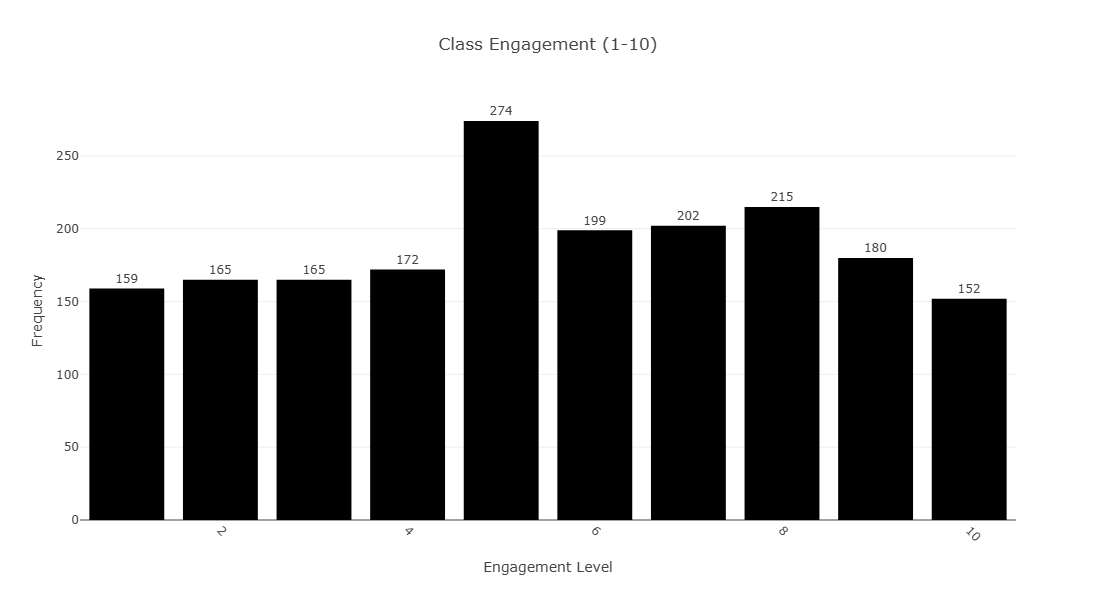

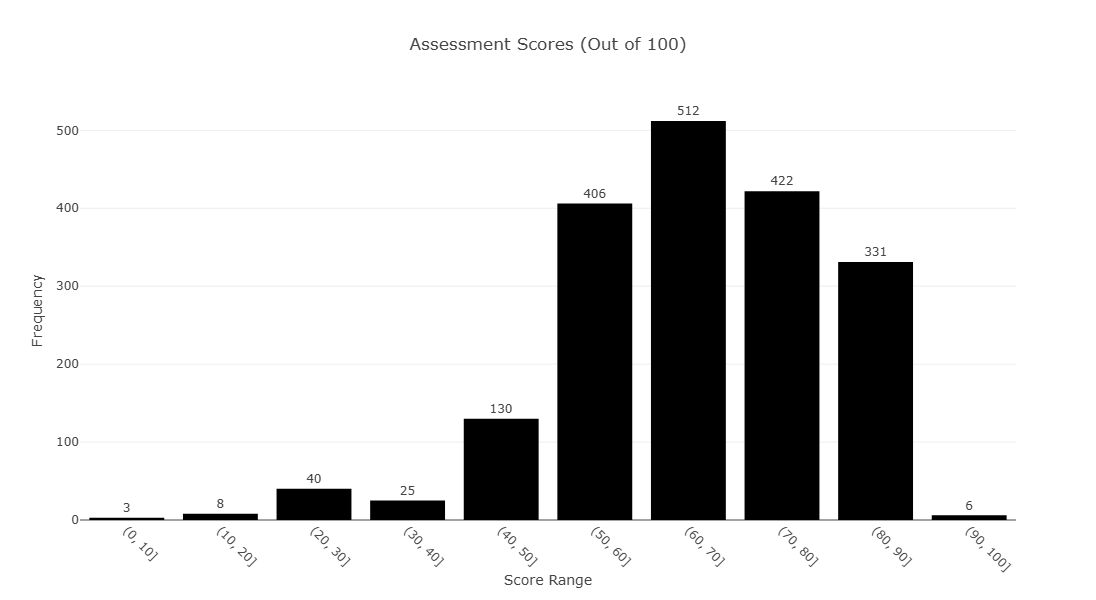

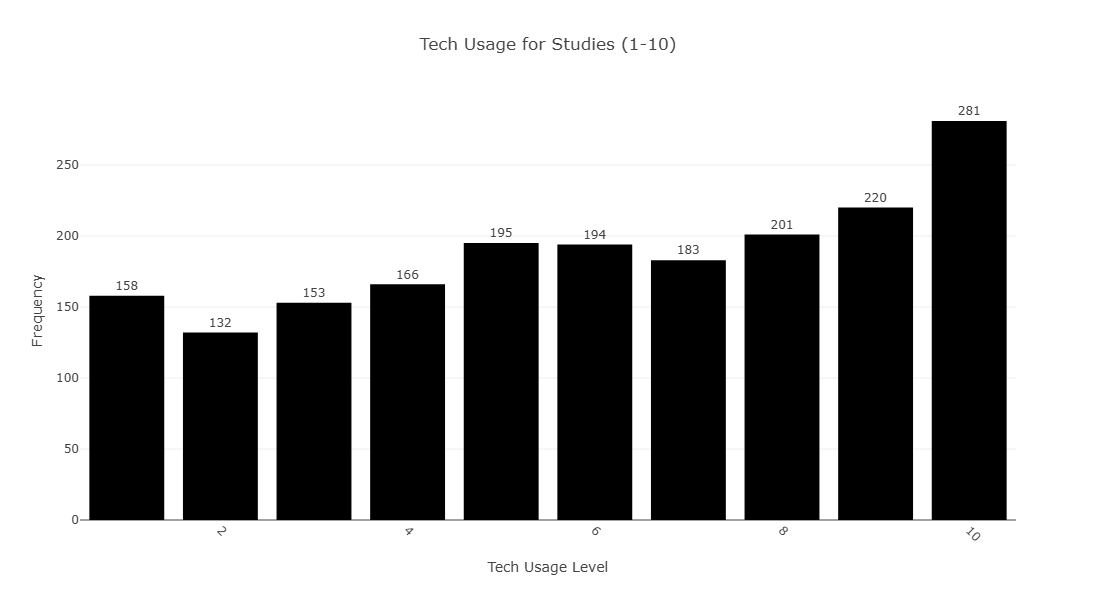

In [588]:
import plotly.express as px
import pandas as pd

# Age Distribution
age_counts = df["What is your age?"].value_counts().sort_index()
fig_age = px.bar(
    x=age_counts.index,
    y=age_counts.values,
    labels={"x": "Age", "y": "Frequency"},
    title="Age Distribution",
    text=age_counts.values  # Show values on bars
)

# Engagement Distribution
engagement_counts = df["On a scale of 1 to 10, how engaged are you during classes?"].value_counts().sort_index()
fig_engagement = px.bar(
    x=engagement_counts.index,
    y=engagement_counts.values,
    labels={"x": "Engagement Level", "y": "Frequency"},
    title="Class Engagement (1-10)",
    text=engagement_counts.values
)

# Assessment Scores Distribution
score_bins = pd.cut(df["What is your average score in assessments? (Please enter a score out of 100)"], bins=range(0, 101, 10))
score_counts = score_bins.value_counts().sort_index()
fig_scores = px.bar(
    x=score_counts.index.astype(str),
    y=score_counts.values,
    labels={"x": "Score Range", "y": "Frequency"},
    title="Assessment Scores (Out of 100)",
    text=score_counts.values
)

# Technology Usage Distribution
tech_usage_counts = df["On a scale of 1 to 10, how much do you use technology for your studies? (1 being not at all, 10 being extensively)"].value_counts().sort_index()
fig_tech = px.bar(
    x=tech_usage_counts.index,
    y=tech_usage_counts.values,
    labels={"x": "Tech Usage Level", "y": "Frequency"},
    title="Tech Usage for Studies (1-10)",
    text=tech_usage_counts.values
)

# Adjust text position, rotation, and layout
fig_age.update_traces(textposition="outside", hoverinfo="x+y")
fig_engagement.update_traces(textposition="outside", hoverinfo="x+y")
fig_scores.update_traces(textposition="outside", hoverinfo="x+y")
fig_tech.update_traces(textposition="outside", hoverinfo="x+y")

# Rotate x-axis labels to avoid overlap
fig_age.update_layout(xaxis_tickangle=45)
fig_engagement.update_layout(xaxis_tickangle=45)
fig_scores.update_layout(xaxis_tickangle=45)
fig_tech.update_layout(xaxis_tickangle=45)

# Increase chart size if necessary
fig_age.update_layout(width=800, height=600)
fig_engagement.update_layout(width=800, height=600)
fig_scores.update_layout(width=800, height=600)
fig_tech.update_layout(width=800, height=600)

# Show the plots
fig_age.show()
fig_engagement.show()
fig_scores.show()
fig_tech.show()


In [589]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
correlation_matrix


,What is your age?,"On a scale of 1 to 10, how engaged are you during classes?",What is your average score in assessments? (Please enter a score out of 100),"On a scale of 1 to 10, how much do you use technology for your studies? (1 being not at all, 10 being extensively)","On a scale of 1 to 10, how would you rate your learning environment"
What is your age?,1.000000,0.040287,-0.016269,0.061131,0.078800
"On a scale of 1 to 10, how engaged are you during classes?",0.040287,1.000000,0.060029,0.133378,0.119933
What is your average score in assessments? (Please enter a score out of 100),-0.016269,0.060029,1.000000,-0.011889,0.029534
"On a scale of 1 to 10, how much do you use technology for your studies? (1 being not at all, 10 being extensively)",0.061131,0.133378,-0.011889,1.000000,0.143341
"On a scale of 1 to 10, how would you rate your learning environment",0.078800,0.119933,0.029534,0.143341,1.000000


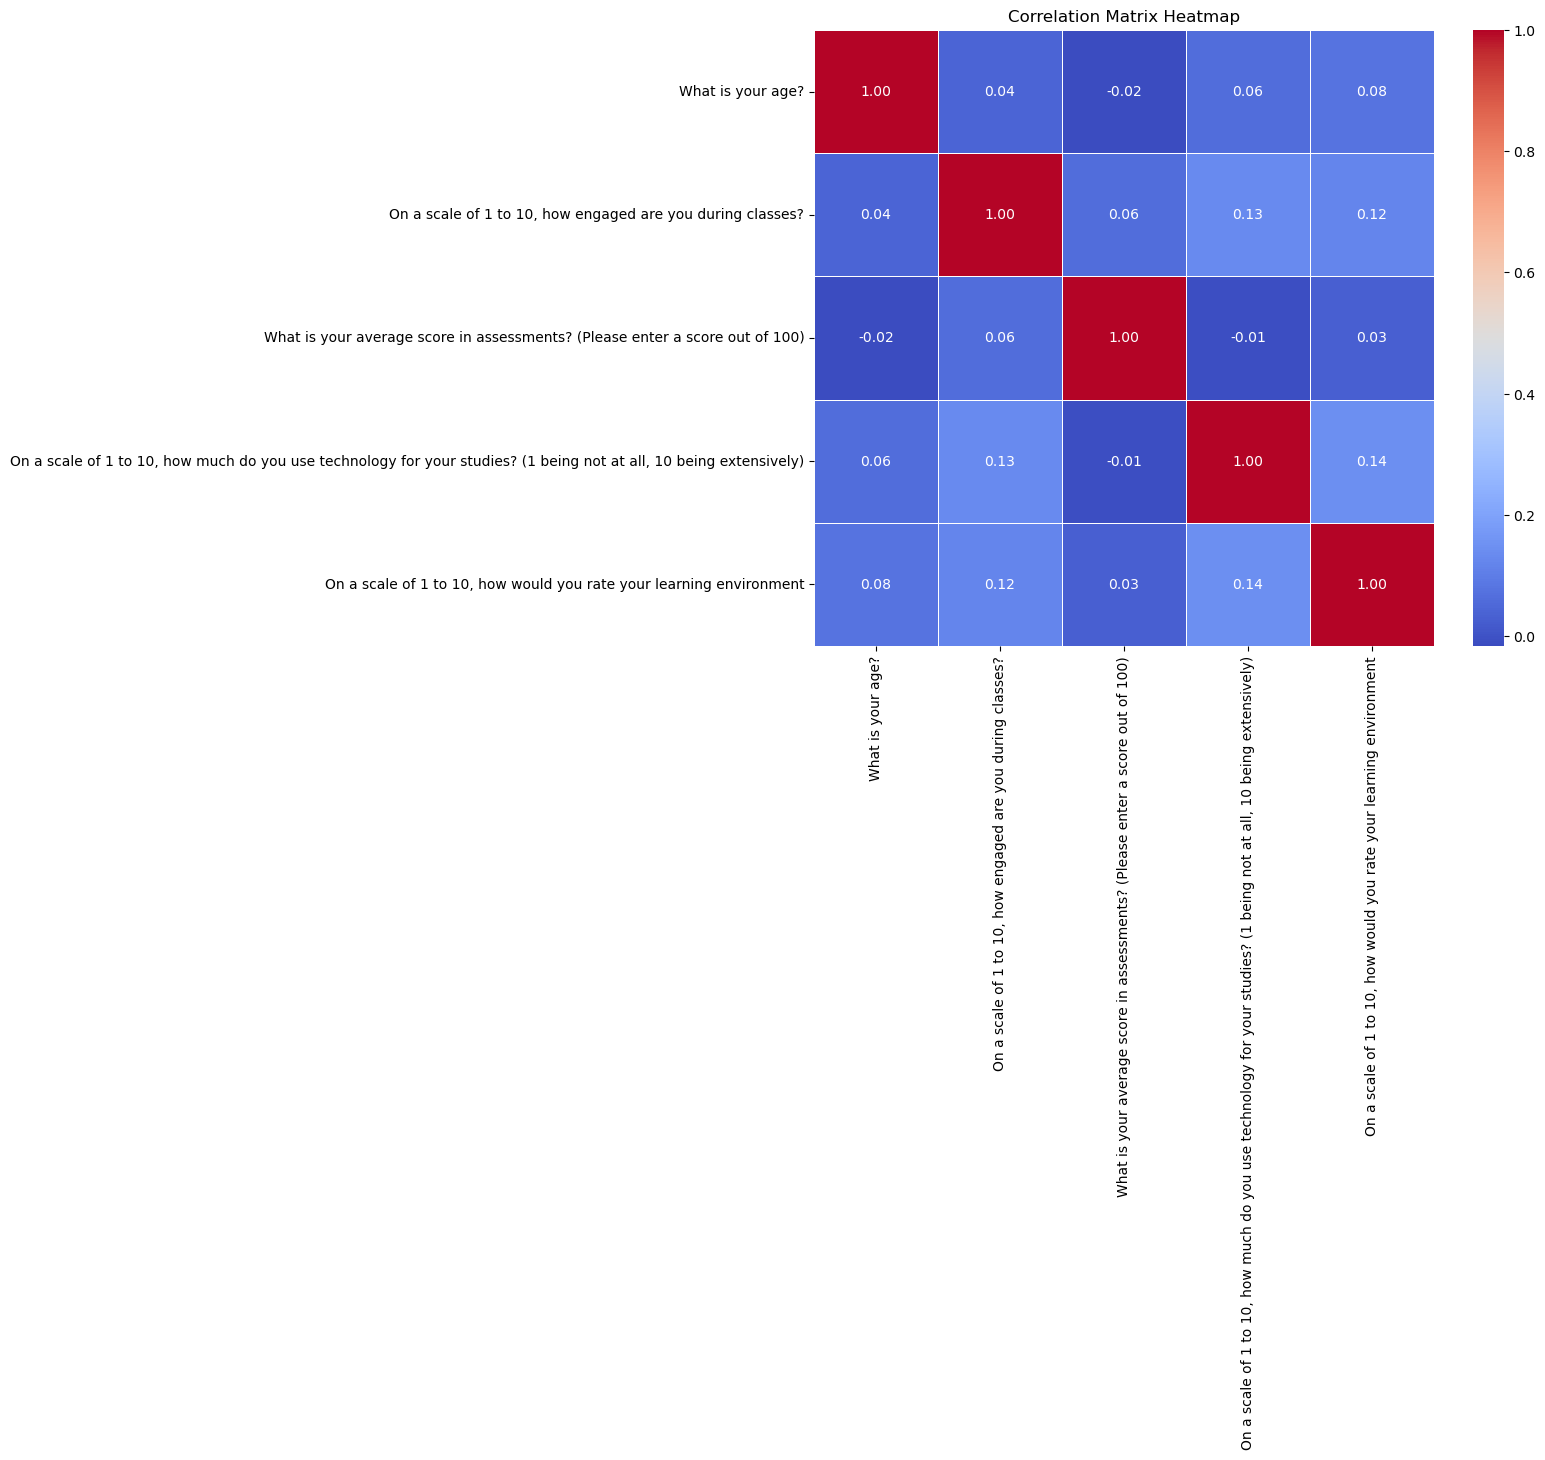

In [593]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))  # Adjust the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()


# Feature Engineering


In [627]:
student_p = df.copy()

In [629]:
student_p

,What is your age?,What is your gender?,What is your level of education?,What year of study are you in?,What is your socioeconomic status?,What is your current marital status?,What is your primary field of study?,What is your cumulative GPA?,What is your current mode of learning?,What is your primary reason for choosing this learning mode?,...,How frequently do you review your notes or course materials?,How would you rate your academic performance in your current learning mode?,How do you assess your understanding of course materials?,How satisfied are you with the feedback you receive on your assignments?,Do you feel that your current learning mode effectively supports your academic goals?,How do you usually prepare for exams? Select the option that applies the most:,What major challenge do you face in your current mode of learning?,Do you feel you have adequate support from instructors in your current learning mode?,How often do you collaborate with classmates on projects or assignments?,"On a scale of 1 to 10, how would you rate your learning environment"
0,27,Male,Undergraduate,First Year,High Income,Widowed,Engineering,3.50-4.49,In-person,Institutional requirement,...,Rarely,Poor,Somewhat confident,Very dissatisfied,Yes,Online resources,Inaccessibility of resources,No,Often,9
1,20,Male,Postgraduate,First Year,High Income,Widowed,Sciences,3.50-4.49,In-person,Personal Preference,...,Weekly,Very Poor,Very unconfident,Neutral,Yes,Self-study,Lack of engagement,Yes,Sometimes,7
2,38,Female,Postgraduate,Fourth year and above,Low Income,Widowed,Other,4.50-5.00,In-person,Other,...,Weekly,Good,Somewhat confident,Dissatisfied,No,Online resources,Others,No,Often,5
3,38,Male,Undergraduate,Third year,Middle Income,Single,Sciences,2.40-3.49,Online,Flexibility,...,Rarely,Very Poor,Very unconfident,Very dissatisfied,No,Online resources,Others,No,Never,10
4,37,Male,Undergraduate,Fourth year and above,High Income,Divorced,Other,1.00-1.49,Online,Institutional requirement,...,Daily,Good,Somewhat unconfident,Very dissatisfied,No,Online resources,Lack of support from instructors,No,Rarely,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878,24,Female,Other,Second year,Middle Income,Single,Other,1.00-1.49,Online,Personal Preference,...,Weekly,Good,Very Confident,Very dissatisfied,Yes,Study groups,"Technical issues (e.g., internet connectivity,...",No,Always,2
1879,22,Male,Undergraduate,Third year,Middle Income,Single,Sciences,2.40-3.49,In-person,Personal Preference,...,Weekly,Good,Somewhat confident,Satisfied,No,Online resources,"Technical issues (e.g., internet connectivity,...",Yes,Sometimes,9
1880,34,Male,Undergraduate,Third year,Middle Income,Married,Social Science,2.40-3.49,Online,Institutional requirement,...,Rarely,Good,Somewhat confident,Satisfied,Yes,Self-study,Lack of support from instructors,No,Rarely,10
1881,23,Female,Undergraduate,Second year,Low Income,Single,Social Science,1.50-2.39,Online,Other,...,Daily,Fair,Neutral,Dissatisfied,Yes,Self-study,Others,No,Often,5


# Separating the data

Binary classification task based on the CGPA ranges, you can create two classes as follows:

Class 1 (High performance): For CGPA ranges between 3.50 - 5.00 (First Class and Second Class Upper).

Class 0 (Low performance): For CGPA ranges between 1.00 - 3.49 (Second Class Lower and Pass).


In [632]:
x = student_p.drop('What is your cumulative GPA?', axis = 1)
y = student_p['What is your cumulative GPA?']


In [634]:
x.head()

,What is your age?,What is your gender?,What is your level of education?,What year of study are you in?,What is your socioeconomic status?,What is your current marital status?,What is your primary field of study?,What is your current mode of learning?,What is your primary reason for choosing this learning mode?,How long have you been in this mode of learning?,...,How frequently do you review your notes or course materials?,How would you rate your academic performance in your current learning mode?,How do you assess your understanding of course materials?,How satisfied are you with the feedback you receive on your assignments?,Do you feel that your current learning mode effectively supports your academic goals?,How do you usually prepare for exams? Select the option that applies the most:,What major challenge do you face in your current mode of learning?,Do you feel you have adequate support from instructors in your current learning mode?,How often do you collaborate with classmates on projects or assignments?,"On a scale of 1 to 10, how would you rate your learning environment"
0,27,Male,Undergraduate,First Year,High Income,Widowed,Engineering,In-person,Institutional requirement,Less than 6 months,...,Rarely,Poor,Somewhat confident,Very dissatisfied,Yes,Online resources,Inaccessibility of resources,No,Often,9
1,20,Male,Postgraduate,First Year,High Income,Widowed,Sciences,In-person,Personal Preference,6 months-1 year,...,Weekly,Very Poor,Very unconfident,Neutral,Yes,Self-study,Lack of engagement,Yes,Sometimes,7
2,38,Female,Postgraduate,Fourth year and above,Low Income,Widowed,Other,In-person,Other,6 months-1 year,...,Weekly,Good,Somewhat confident,Dissatisfied,No,Online resources,Others,No,Often,5
3,38,Male,Undergraduate,Third year,Middle Income,Single,Sciences,Online,Flexibility,6 months-1 year,...,Rarely,Very Poor,Very unconfident,Very dissatisfied,No,Online resources,Others,No,Never,10
4,37,Male,Undergraduate,Fourth year and above,High Income,Divorced,Other,Online,Institutional requirement,6 months-1 year,...,Daily,Good,Somewhat unconfident,Very dissatisfied,No,Online resources,Lack of support from instructors,No,Rarely,8


In [636]:
y

0       3.50-4.49
1       3.50-4.49
2       4.50-5.00
3       2.40-3.49
4       1.00-1.49
          ...    
1878    1.00-1.49
1879    2.40-3.49
1880    2.40-3.49
1881    1.50-2.39
1882    2.40-3.49
Name: What is your cumulative GPA?, Length: 1883, dtype: object

In [638]:
# Define the mapping function for CGPA ranges
def map_cgpa_to_class(cgpa_range):
    # Split the range (e.g., "3.50-4.49") and convert to float for comparison
    lower, upper = cgpa_range.split('-')
    lower, upper = float(lower), float(upper)
    
    # Map based on the range (consider both lower and upper bounds)
    if 1.00 <= lower <= 3.49:  # Low performance range
        return 0  # Class 0 (Low performance)
    elif 3.50 <= lower <= 5.00:  # High performance range
        return 1  # Class 1 (High performance)
    else:
        return None  # In case of any other values (shouldn't be necessary)

# Apply the function to the y (CGPA range values)
y = y.map(map_cgpa_to_class)

# Check the distribution of the new performance classes
print(y.value_counts())  # Corrected to 'y' instead of 'y_c'


What is your cumulative GPA?
0    1182
1     701
Name: count, dtype: int64


In [640]:
y

0       1
1       1
2       1
3       0
4       0
       ..
1878    0
1879    0
1880    0
1881    0
1882    0
Name: What is your cumulative GPA?, Length: 1883, dtype: int64

In [642]:
x.shape, y.shape

((1883, 31), (1883,))

In [644]:
# Iterate over each column in the DataFrame
for label, content in x.items():
    
    # Check if the content of the current column is not numeric
    if not pd.api.types.is_numeric_dtype(content):
        
        # Print the column name if it's not numeric
        print(label)


What is your gender?
What is your level of education?
What year of study are you in?
What is your socioeconomic status?
What is your current marital status?
What is your primary field of study?
What is your current mode of learning?
What is your primary reason for choosing this learning mode?
How long have you been in this mode of learning?
How long does it take to travel from home to school? (in- person mode)
How often do you participate in online discussions or forums?
What is your average class attendance rate? (Please enter a percentage)
How much free time do you have after school?
What challenges do you face due to external factors?
How do you prepare for assessments?  Select the option that applies the most:
How often do you complete your assignments on time?
How would you rate the quality of the course materials you receive?
How frequently do you review your notes or course materials?
How would you rate your academic performance in your current learning mode?
How do you assess y

In [646]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in the DataFrame
for label, content in x.items():
    # Check if the content of the current column is not numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Print the column name if it's not numeric
        print(f"Converting column: {label}")
        
        # Apply LabelEncoder to convert the non-numeric column to numeric
        # Ensure the transformation applies only to the specific column
        x[label] = label_encoder.fit_transform(content.astype(str))

# Check the shape of x
print(x.shape)  # This should remain (1883, 31)


Converting column: What is your gender?
Converting column: What is your level of education?
Converting column: What year of study are you in?
Converting column: What is your socioeconomic status?
Converting column: What is your current marital status?
Converting column: What is your primary field of study?
Converting column: What is your current mode of learning?
Converting column: What is your primary reason for choosing this learning mode?
Converting column: How long have you been in this mode of learning?
Converting column: How long does it take to travel from home to school? (in- person mode)
Converting column: How often do you participate in online discussions or forums?
Converting column: What is your average class attendance rate? (Please enter a percentage)
Converting column: How much free time do you have after school?
Converting column: What challenges do you face due to external factors?
Converting column: How do you prepare for assessments?  Select the option that applies t

In [648]:
print(x)

      What is your age?  What is your gender?  \
0                    27                     1   
1                    20                     1   
2                    38                     0   
3                    38                     1   
4                    37                     1   
...                 ...                   ...   
1878                 24                     0   
1879                 22                     1   
1880                 34                     1   
1881                 23                     0   
1882                 25                     0   

      What is your level of education?  What year of study are you in?  \
0                                    2                               0   
1                                    1                               0   
2                                    1                               1   
3                                    2                               3   
4                                    2   

In [650]:
x.shape, y.shape

((1883, 31), (1883,))

# Splitting our dataset

In [653]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)


In [655]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((1506, 31), (377, 31), (1506,), (377,))

# Model Training`


In [658]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Initialize models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),  # Increase max_iter
    'RandomForest': RandomForestClassifier(n_estimators=100),
    'DecisionTree': DecisionTreeClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True)
}

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Function to fit and score the models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)  # For reproducibility
    model_scores = {}
    
    for name, model in models.items():
        # Fit the model on training data
        model.fit(x_train, y_train)
        
        # Evaluate the model
        score = model.score(x_test, y_test)  # Accuracy score on the test set
        model_scores[name] = score
    
    return model_scores

# Get model scores
model_scores = fit_and_score(models, x_train, x_test, y_train, y_test)

# Print the model scores
model_scores


{'LogisticRegression': 0.6472148541114059,
 'RandomForest': 0.6710875331564987,
 'DecisionTree': 0.5702917771883289,
 'GradientBoosting': 0.6604774535809018,
 'KNN': 0.6312997347480106,
 'SVM': 0.6445623342175066}

In [660]:
# Create a dataframe from the model_scores dictionary
df_scores = pd.DataFrame.from_dict(model_scores, orient='index', columns=['Score'])
df_scores

,Score
LogisticRegression,0.647215
RandomForest,0.671088
DecisionTree,0.570292
GradientBoosting,0.660477
KNN,0.631300
SVM,0.644562


In [662]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Simulated dataset (replace x and y with actual data)
# x, y = ... (Load your dataset here)

# Split the dataset into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define individual models as base estimators
base_estimators = [
    ('LogisticRegression', LogisticRegression(max_iter=1000)),  # Logistic Regression
    ('DecisionTree', DecisionTreeClassifier()),                # Decision Tree
    ('GradientBoosting', GradientBoostingClassifier()),        # Gradient Boosting
    ('KNN', KNeighborsClassifier()),                           # K-Nearest Neighbors
    ('SVM', SVC(probability=True))                             # Support Vector Machine
]

# Define RandomForest as the meta-model
meta_model = RandomForestClassifier(n_estimators=100)

# Create the stacking classifier
stacked_model = StackingClassifier(estimators=base_estimators, final_estimator=meta_model)

# Fit the stacked model to the training data
stacked_model.fit(x_train, y_train)

# Evaluate the stacked model
stacked_model_score = stacked_model.score(x_test, y_test)

# Print the performance of the stacked model
print(f"Stacked Model Accuracy with RandomForest as Meta-Model: {stacked_model_score}")


Stacked Model Accuracy with RandomForest as Meta-Model: 0.623342175066313


# Evaluating  machine learning model

In [664]:
# Get predictions on the test set
predictions = stacked_model.predict(x_test)

# Print predictions
print(f"Predictions: {predictions}")


Predictions: [0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0
 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 1 1 1]


ROC-AUC: 0.5337970640624039


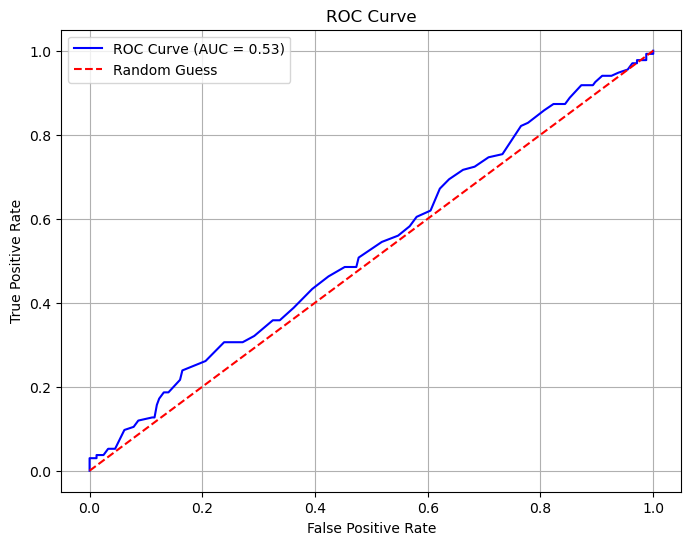

In [665]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Get predictions on the test set
predictions = stacked_model.predict(x_test)
probabilities = stacked_model.predict_proba(x_test)[:, 1]  # Use probabilities for ROC-AUC

# ROC-AUC
roc_auc = roc_auc_score(y_test, probabilities)
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

print(f"ROC-AUC: {roc_auc}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()




In [675]:
# Classification Report
class_report = classification_report(y_test, predictions)
print(f"Classification Report:\n{class_report}")

# Precision, Recall, and F1-Score
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.84      0.74       243
           1       0.44      0.24      0.31       134

    accuracy                           0.62       377
   macro avg       0.56      0.54      0.53       377
weighted avg       0.59      0.62      0.59       377

Precision: 0.4444444444444444
Recall: 0.23880597014925373
F1-Score: 0.3106796116504854


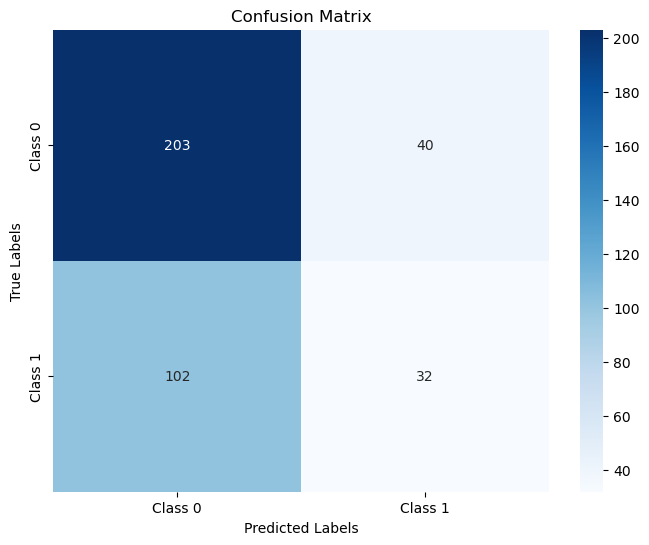

In [677]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get predictions on the test set
predictions = stacked_model.predict(x_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [679]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import numpy as np

# Fit the stacked model to the training data (already done in your code)
stacked_model.fit(x_train, y_train)

# Get feature importance from the RandomForest meta-model
meta_model_rf = stacked_model.final_estimator  # Access the final estimator (meta-model)
if hasattr(meta_model_rf, 'feature_importances_'):  # Ensure the model supports feature importance
    feature_importances = meta_model_rf.feature_importances_

    # Plotting the feature importances
    feature_names = [f'Feature {i+1}' for i in range(x_train.shape[1])]  # Generate feature names

    # Sort feature importances in descending order
    indices = np.argsort(feature_importances)[::-1]

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    plt.barh(range(x_train.shape[1]), feature_importances[indices], align='center')
    plt.yticks(range(x_train.shape[1]), np.array(feature_names)[indices])
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance from RandomForest (Meta-Model)')
    plt.show()
else:
    print("Meta-model does not support feature importances.")


Meta-model does not support feature importances.


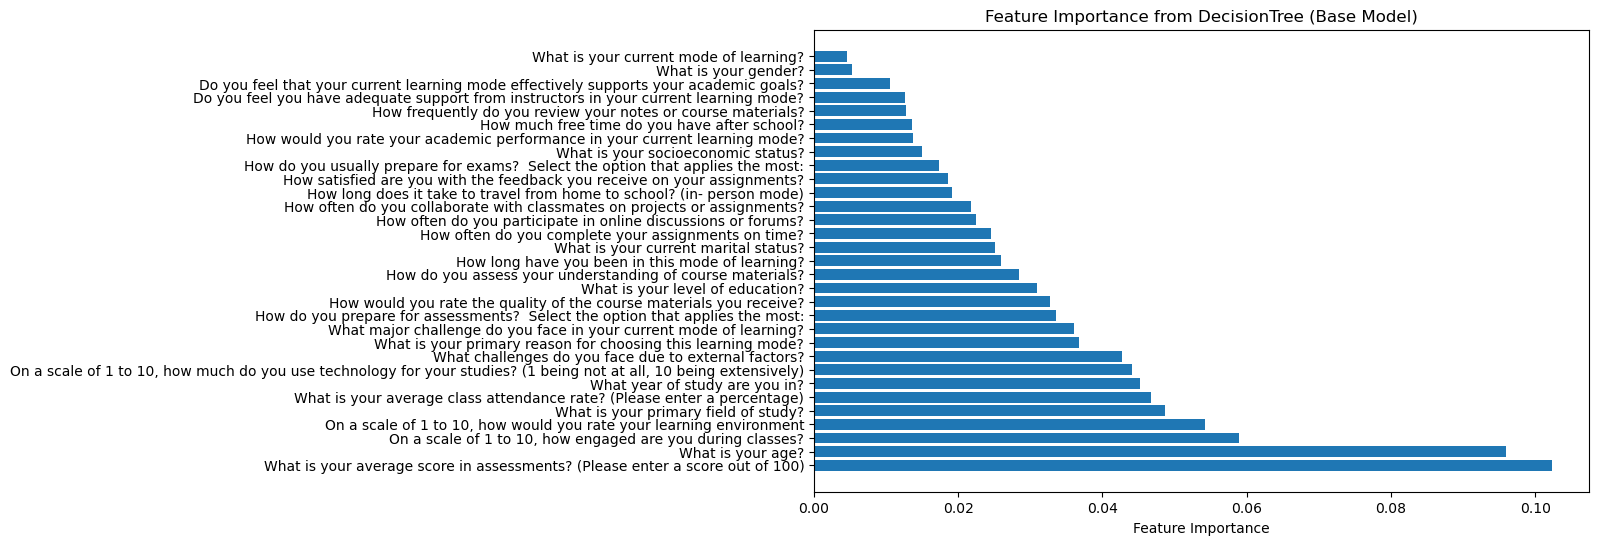

In [680]:
# Fit the stacked model to the training data (already done in your code)
stacked_model.fit(x_train, y_train)

# Access the DecisionTree model from the stacking classifier
dt_model = stacked_model.named_estimators_['DecisionTree']  # Access DecisionTree base model

# Check if the model has feature_importances_ attribute
if hasattr(dt_model, 'feature_importances_'):
    # Get the feature importances from the DecisionTree model
    feature_importances = dt_model.feature_importances_

    # Use the actual column names from the DataFrame (if x_train is a DataFrame)
    if hasattr(x_train, 'columns'):
        feature_names = x_train.columns  # Get the actual column names from the DataFrame
    else:
        feature_names = [f'Feature {i+1}' for i in range(x_train.shape[1])]  # If x_train is not a DataFrame, create generic feature names

    # Sort feature importances in descending order
    indices = np.argsort(feature_importances)[::-1]

    # Create the bar plot to visualize the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(range(x_train.shape[1]), feature_importances[indices], align='center')
    plt.yticks(range(x_train.shape[1]), np.array(feature_names)[indices])
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance from DecisionTree (Base Model)')
    plt.show()
else:
    print("DecisionTree base model does not support feature importances.")


In [681]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define individual models as base estimators for Stacking Classifier
base_estimators = [
    ('LogisticRegression', LogisticRegression(max_iter=1000)),  # Logistic Regression
    ('DecisionTree', DecisionTreeClassifier()),                # Decision Tree
    ('GradientBoosting', GradientBoostingClassifier()),        # Gradient Boosting
    ('KNN', KNeighborsClassifier()),                           # K-Nearest Neighbors
    ('SVM', SVC(probability=True))                             # Support Vector Machine
]

# Define LogisticRegression as the meta-model for stacking
meta_model = LogisticRegression(max_iter=1000)

# Create the stacking classifier
stacked_model = StackingClassifier(estimators=base_estimators, final_estimator=meta_model)

# Fit the stacking model to the training data
stacked_model.fit(x_train, y_train)

# Evaluate the stacked model
stacked_model_score = stacked_model.score(x_test, y_test)

# Initialize individual classifiers for Voting Classifier
clf1 = LogisticRegression(max_iter=1000)
clf2 = DecisionTreeClassifier()
clf3 = SVC(probability=True)

# Create a hard voting classifier
voting_clf = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('svc', clf3)], voting='hard')

# Fit the voting classifier
voting_clf.fit(x_train, y_train)

# Make predictions with both models
y_pred_stacked = stacked_model.predict(x_test)
y_pred_voting = voting_clf.predict(x_test)

# Print accuracy for both models
print(f"Stacked Model Accuracy with Logistic Regression Meta-Model: {stacked_model_score:.2f}")
print(f"Voting Classifier Accuracy: {accuracy_score(y_test, y_pred_voting):.2f}")


Stacked Model Accuracy with Logistic Regression Meta-Model: 0.64
Voting Classifier Accuracy: 0.64


In [682]:
# Make predictions with both models
y_pred_stacked = stacked_model.predict(x_test)
y_pred_voting = voting_clf.predict(x_test)

# Print predictions for both models
print("Predictions from Stacked Model:")
print(y_pred_stacked)

print("\nPredictions from Voting Classifier:")
print(y_pred_voting)


Predictions from Stacked Model:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]

Predictions from Voting Classifier:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 

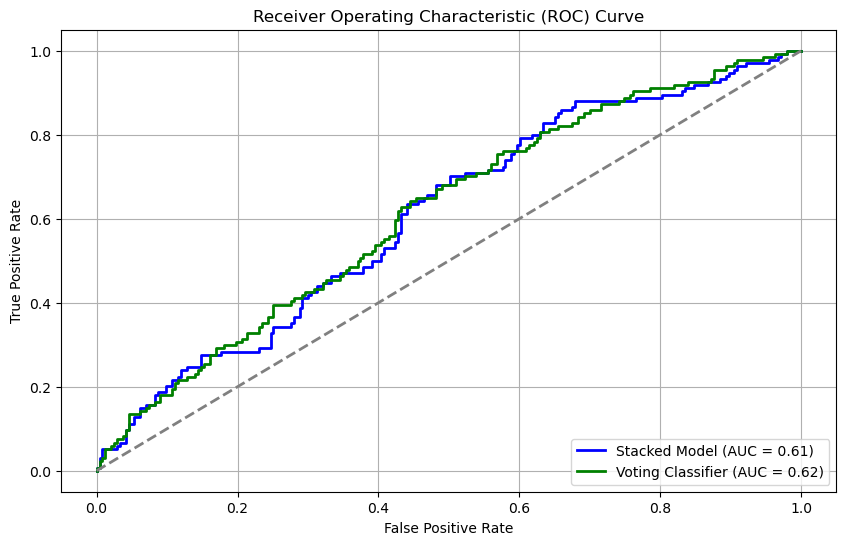

In [544]:
# Initialize individual classifiers for Voting Classifier (using soft voting)
clf1 = LogisticRegression(max_iter=1000)
clf2 = DecisionTreeClassifier()
clf3 = SVC(probability=True)

# Create a soft voting classifier (allowing predict_proba)
voting_clf = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('svc', clf3)], voting='soft')

# Fit the voting classifier
voting_clf.fit(x_train, y_train)

# Get predicted probabilities for both models
y_pred_proba_stacked = stacked_model.predict_proba(x_test)[:, 1]  # Probabilities for the positive class
y_pred_proba_voting = voting_clf.predict_proba(x_test)[:, 1]  # Probabilities for the positive class

# Plotting ROC Curves for both models
plt.figure(figsize=(10, 6))

# Stacked Model ROC Curve
fpr_stack, tpr_stack, _ = roc_curve(y_test, y_pred_proba_stacked)
roc_auc_stack = auc(fpr_stack, tpr_stack)
plt.plot(fpr_stack, tpr_stack, color='blue', lw=2, label=f'Stacked Model (AUC = {roc_auc_stack:.2f})')

# Voting Classifier ROC Curve
fpr_vote, tpr_vote, _ = roc_curve(y_test, y_pred_proba_voting)
roc_auc_vote = auc(fpr_vote, tpr_vote)
plt.plot(fpr_vote, tpr_vote, color='green', lw=2, label=f'Voting Classifier (AUC = {roc_auc_vote:.2f})')

# Plotting settings
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


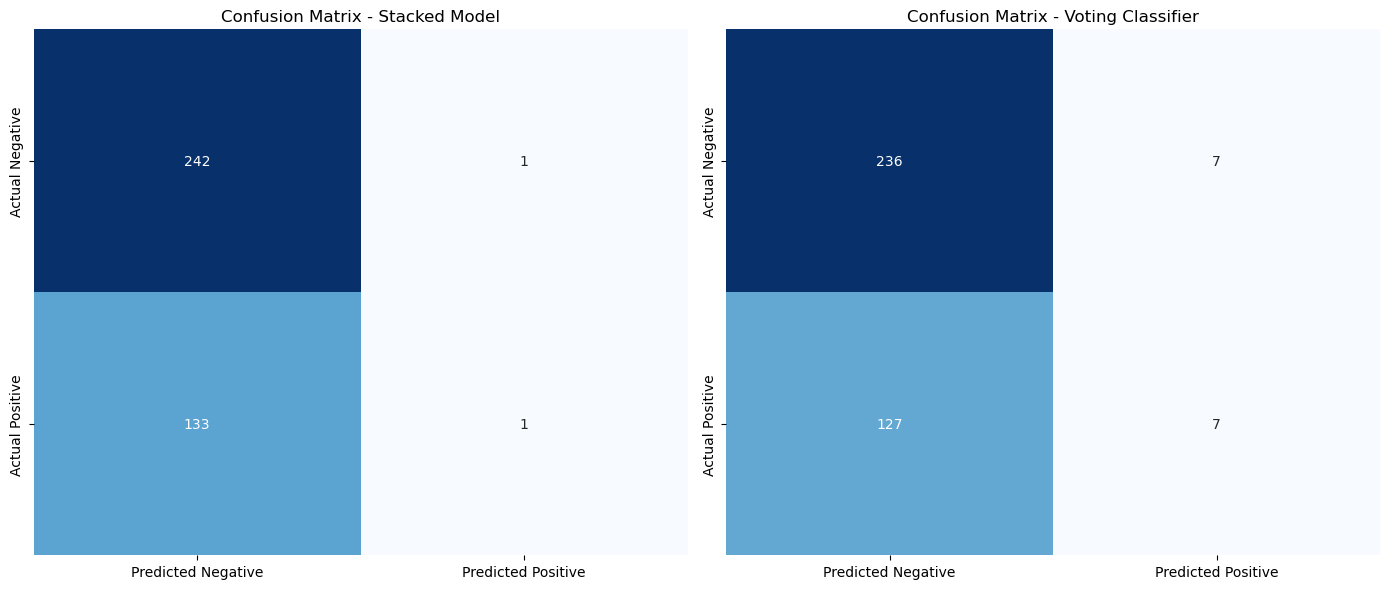

Confusion Matrix for Stacked Model:
[[242   1]
 [133   1]]

Confusion Matrix for Voting Classifier:
[[236   7]
 [127   7]]


In [689]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix for Stacked Model
conf_matrix_stack = confusion_matrix(y_test, y_pred_stacked)

# Confusion Matrix for Voting Classifier
conf_matrix_vote = confusion_matrix(y_test, y_pred_voting)

# Plotting Confusion Matrices
plt.figure(figsize=(14, 6))

# Plot for Stacked Model
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_stack, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix - Stacked Model')

# Plot for Voting Classifier
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_vote, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix - Voting Classifier')

plt.tight_layout()
plt.show()

# Optionally, you can print the confusion matrices as well
print("Confusion Matrix for Stacked Model:")
print(conf_matrix_stack)

print("\nConfusion Matrix for Voting Classifier:")
print(conf_matrix_vote)


Feature Importance for Stacked Model:

In [692]:
# Extract feature importances from the base models of the Stacked Classifier
for name, model in stacked_model.named_estimators_.items():
    if hasattr(model, 'feature_importances_'):  # Check if model has feature importance
        print(f"Feature importance from {name}:")
        print(model.feature_importances_)


Feature importance from DecisionTree:
[0.10300532 0.00871573 0.03338284 0.03725072 0.02196788 0.02462943
 0.04325472 0.00446336 0.0367343  0.01382646 0.02022218 0.02262901
 0.04971923 0.06421322 0.09575615 0.00848589 0.03675036 0.03377252
 0.02339772 0.04830508 0.0285888  0.01481999 0.01620324 0.0228992
 0.01939969 0.01546704 0.01870709 0.04821325 0.0126859  0.02517202
 0.04736164]
Feature importance from GradientBoosting:
[0.12169979 0.00300476 0.04387233 0.01457548 0.03219373 0.029099
 0.04054831 0.00695814 0.02236661 0.02075537 0.00477579 0.05851888
 0.03152717 0.05815131 0.11744111 0.0229495  0.04156967 0.0279722
 0.02371661 0.02182707 0.03782414 0.01239187 0.04547646 0.03018155
 0.0228511  0.         0.01024042 0.03515418 0.00732939 0.02141303
 0.03361502]


For Logistic Regression:

In [695]:
# Logistic Regression Coefficients (for feature importance)
log_reg_coeff = stacked_model.named_estimators_['LogisticRegression'].coef_
print("Logistic Regression Coefficients:", log_reg_coeff)


Logistic Regression Coefficients: [[ 0.00846447  0.01442671 -0.2049787  -0.06844894  0.04476688  0.03036165
   0.0108358  -0.20241219  0.03255381  0.08866728  0.06996645 -0.05781729
   0.01037571  0.01467683  0.01818471  0.05481889  0.03226611 -0.03143079
  -0.03286124  0.01246841  0.01298007 -0.04730439 -0.07510991  0.07438017
   0.0071112   0.02022914  0.02913712 -0.02951619 -0.0995132   0.01136961
  -0.00149896]]


Feature Importance for Voting Classifier:

In [698]:
# Check for feature importances from individual models in the Voting Classifier
for name, model in voting_clf.named_estimators_.items():
    if hasattr(model, 'feature_importances_'):  # Check if model has feature importance
        print(f"Feature importance from {name}:")
        print(model.feature_importances_)
    elif hasattr(model, 'coef_'):  # For Logistic Regression, look at coefficients
        print(f"Coefficients from {name}:")
        print(model.coef_)


Coefficients from lr:
[[ 0.00846447  0.01442671 -0.2049787  -0.06844894  0.04476688  0.03036165
   0.0108358  -0.20241219  0.03255381  0.08866728  0.06996645 -0.05781729
   0.01037571  0.01467683  0.01818471  0.05481889  0.03226611 -0.03143079
  -0.03286124  0.01246841  0.01298007 -0.04730439 -0.07510991  0.07438017
   0.0071112   0.02022914  0.02913712 -0.02951619 -0.0995132   0.01136961
  -0.00149896]]
Feature importance from dt:
[0.09554852 0.01060148 0.03035216 0.03650428 0.02432507 0.02423415
 0.04105181 0.00639809 0.03404261 0.0213178  0.01818176 0.02969201
 0.04507705 0.05119927 0.09717234 0.01037165 0.04400786 0.0252854
 0.02897883 0.05202608 0.03198316 0.01583227 0.01878991 0.02441821
 0.01663229 0.01006325 0.01802688 0.03983302 0.01682783 0.02766391
 0.05356106]


In [700]:
# Check for feature importances from individual models in the Voting Classifier
for name, model in voting_clf.named_estimators_.items():
    if hasattr(model, 'feature_importances_'):  # Check if model has feature importance
        print(f"Feature importance from {name}:")
        print(model.feature_importances_)
    elif hasattr(model, 'coef_'):  # For Logistic Regression, look at coefficients
        print(f"Coefficients from {name}:")
        print(model.coef_)


Coefficients from lr:
[[ 0.00846447  0.01442671 -0.2049787  -0.06844894  0.04476688  0.03036165
   0.0108358  -0.20241219  0.03255381  0.08866728  0.06996645 -0.05781729
   0.01037571  0.01467683  0.01818471  0.05481889  0.03226611 -0.03143079
  -0.03286124  0.01246841  0.01298007 -0.04730439 -0.07510991  0.07438017
   0.0071112   0.02022914  0.02913712 -0.02951619 -0.0995132   0.01136961
  -0.00149896]]
Feature importance from dt:
[0.09554852 0.01060148 0.03035216 0.03650428 0.02432507 0.02423415
 0.04105181 0.00639809 0.03404261 0.0213178  0.01818176 0.02969201
 0.04507705 0.05119927 0.09717234 0.01037165 0.04400786 0.0252854
 0.02897883 0.05202608 0.03198316 0.01583227 0.01878991 0.02441821
 0.01663229 0.01006325 0.01802688 0.03983302 0.01682783 0.02766391
 0.05356106]


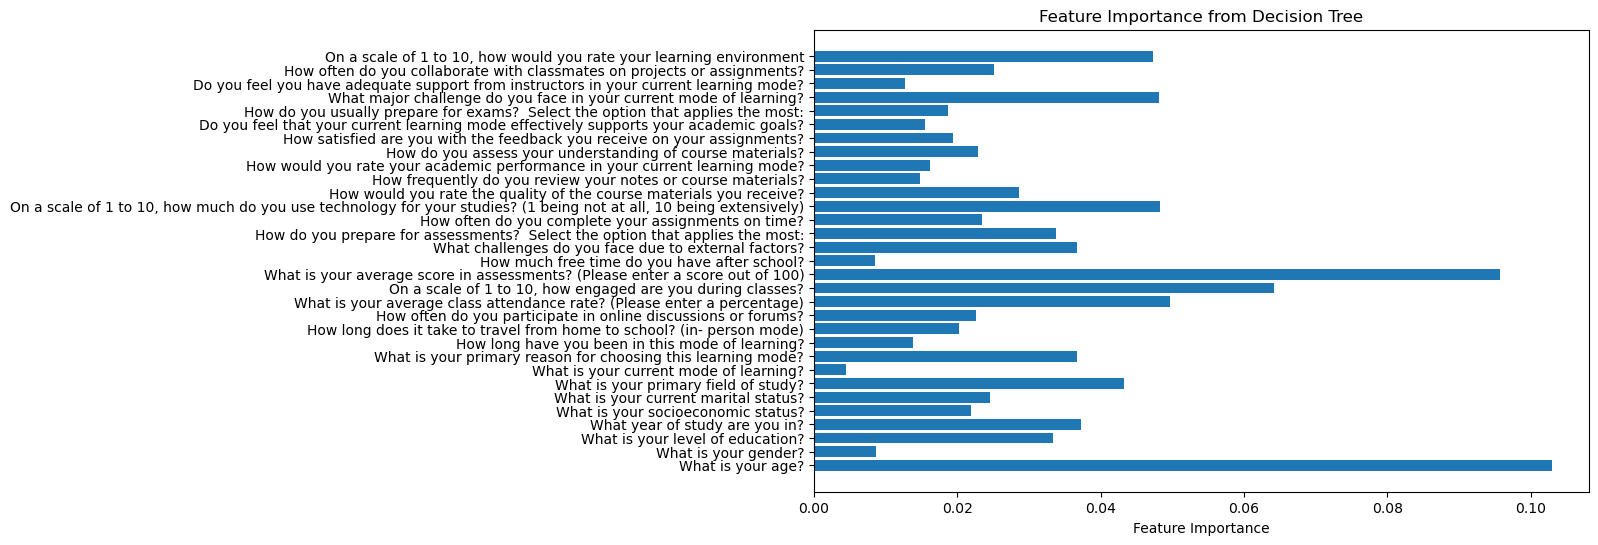

In [702]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataset has feature names in x_train.columns
feature_names = x_train.columns  # Replace with actual feature names

# Example: Extract feature importance from DecisionTreeClassifier in the stacked model
feature_importances_decision_tree = stacked_model.named_estimators_['DecisionTree'].feature_importances_

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_importances_decision_tree)), feature_importances_decision_tree, align='center')
plt.yticks(np.arange(len(feature_importances_decision_tree)), feature_names)  # Use feature names here
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Decision Tree')
plt.show()


In [713]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define individual models as base estimators for Stacking Classifier
base_estimators = [
    ('LogisticRegression', LogisticRegression()),  # Logistic Regression
    ('RandomForest', RandomForestClassifier()),    # Random Forest
    ('KNN', KNeighborsClassifier())                # K-Nearest Neighbors
]

# Define LogisticRegression as the meta-model for stacking
meta_model = LogisticRegression()

# Create the stacking classifier
stacked_model = StackingClassifier(estimators=base_estimators, final_estimator=meta_model)

# Display the stacking model
stacked_model


StackingClassifier(estimators=[('LogisticRegression', LogisticRegression()),
                               ('RandomForest', RandomForestClassifier()),
                               ('KNN', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())